# Vertex AI Model Garden - Test Model Deployments


## Overview

This notebook is used to access the models you have just deployed.


## Initialize Vertex AI 

Run the next 2 cells.

In [1]:
pip install --upgrade google-cloud-aiplatform google-cloud-logging

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [google-cloud-logging]gle-cloud-logging]
Note: you may need to restart the kernel to use updated packages.


In [4]:
project="qwiklabs-asl-01-752ad6b30635"
region="us-central1"

In [5]:
import vertexai
from vertexai.preview import model_garden

# TODO Add your project and location to initialize vertxai

# vertexai.init(project="<GCP-Project-ID-here", location="GCP-Project-Region-Here")
vertexai.init(project=project, location=region)



In [9]:
vertexai

<module 'vertexai' from '/opt/conda/lib/python3.10/site-packages/vertexai/__init__.py'>

## Test the CodeGemma deployment

In [6]:
# once models have been deployed from model garden
# get the endpoints from https://console.cloud.google.com/vertex-ai/online-prediction/endpoints?project=qwiklabs-asl-01-752ad6b30635
ENDPOINT_ID = "2165944448230359040"

In [7]:
import google.cloud.logging
import logging

from google.cloud import aiplatform

# Do not remove logging section
client = google.cloud.logging.Client()
client.setup_logging()


# Replace your project number and endpoint id

endpoint_resource_name=f"projects/{project}/locations/{region}/endpoints/{ENDPOINT_ID}"
endpoint=aiplatform.Endpoint(endpoint_resource_name)


In [25]:
# prompt = "Write a function to list n Fibonacci numbers in Python." 
prompt = "Write a full Python function to list n Fibonacci numbers. Then please give me a code example to test the function." 
max_tokens = 4096 # 500 
temperature = 0.0 # 1.0 
top_p = 0.95 # 1.0  
top_k = 1 

# ADDED
parameters = {
    "temperature": temperature,
    "max_output_tokens": max_tokens, # Note the name change
    # "top_p": top_p,
    # "top_k": top_k
}

instances = [
    # {
    #  # Fill in the appropriate configuration
    # },
    # ADDED
    {"prompt": prompt},
]



#response = endpoint.predict(
#     instances=instances
# )
# UPDATED
response = endpoint.predict(
    instances=instances,
    parameters=parameters
)

# "<|file_separator|>" is the end of the file token.
for prediction in response.predictions:
    print(prediction.split("<|file_separator|>")[0])


print(response.deployed_model_id)

# Do not remove logging section
log_message = f"Fibonacci function: {response}"
logging.info(log_message)

Prompt:
Write a full Python function to list n Fibonacci numbers. Then please give me a code example to test the function.
Output:
 Code Example.py
<|fim_prefix|>
def fibonacci_sequence(n):
    
5396498726636224512


INFO:root:Fibonacci function: Prediction(predictions=['Prompt:\nWrite a full Python function to list n Fibonacci numbers. Then please give me a code example to test the function.\nOutput:\n Code Example.py\n<|fim_prefix|>\ndef fibonacci_sequence(n):\n    '], deployed_model_id='5396498726636224512', metadata=None, model_version_id='1', model_resource_name='projects/474364176233/locations/us-central1/models/google_codegemma-2b-1760410534641', explanations=None)


In [27]:
# seems like codegemma's performance is low
response

Prediction(predictions=['Prompt:\nWrite a full Python function to list n Fibonacci numbers. Then please give me a code example to test the function.\nOutput:\n Code Example.py\n<|fim_prefix|>\ndef fibonacci_sequence(n):\n    '], deployed_model_id='5396498726636224512', metadata=None, model_version_id='1', model_resource_name='projects/474364176233/locations/us-central1/models/google_codegemma-2b-1760410534641', explanations=None)

In [ ]:
# on the UI

# Prompt:
# Write a full Python function to list n Fibonacci numbers. Then please give me a code example to test the function.
# Output:
# py
# <|fim_prefix|><|fim_suffix|><|fim_middle|>def fibonacci(n):
#     if n <= 0:
#         return []
#     elif n == 1:
#         return [0]
#     elif n == 2:
#         return [0, 1]
#     else:
#         fib_sequence = [0, 1]
#         while len(fib_sequence) < n:
#             next_number = fib_sequence[-1] + fib_sequence[-2]
#             fib_sequence.append(next_number)
#         return fib_sequence

# n = int(input("Enter the number of Fibonacci numbers to generate: "))
# fibonacci_numbers = fibonacci(n)
# print(fibonacci_numbers)
# <|file_separator|>

## Test the Stable Diffusion XL deployment

In [28]:
ENDPOINT_ID2 = "mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f"

INFO:root:photorealistic image: Prediction(predictions=['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwC6qD1FTKoz1FVFkY9/1qZGJx/jWdiy2uBTwagTNSigCQH2pwJpq1IKVxgtPxQKWkAmKaRUlBFICEikxU22mlaB2ICKjYGp2WmFadwKzKahZDVspTC

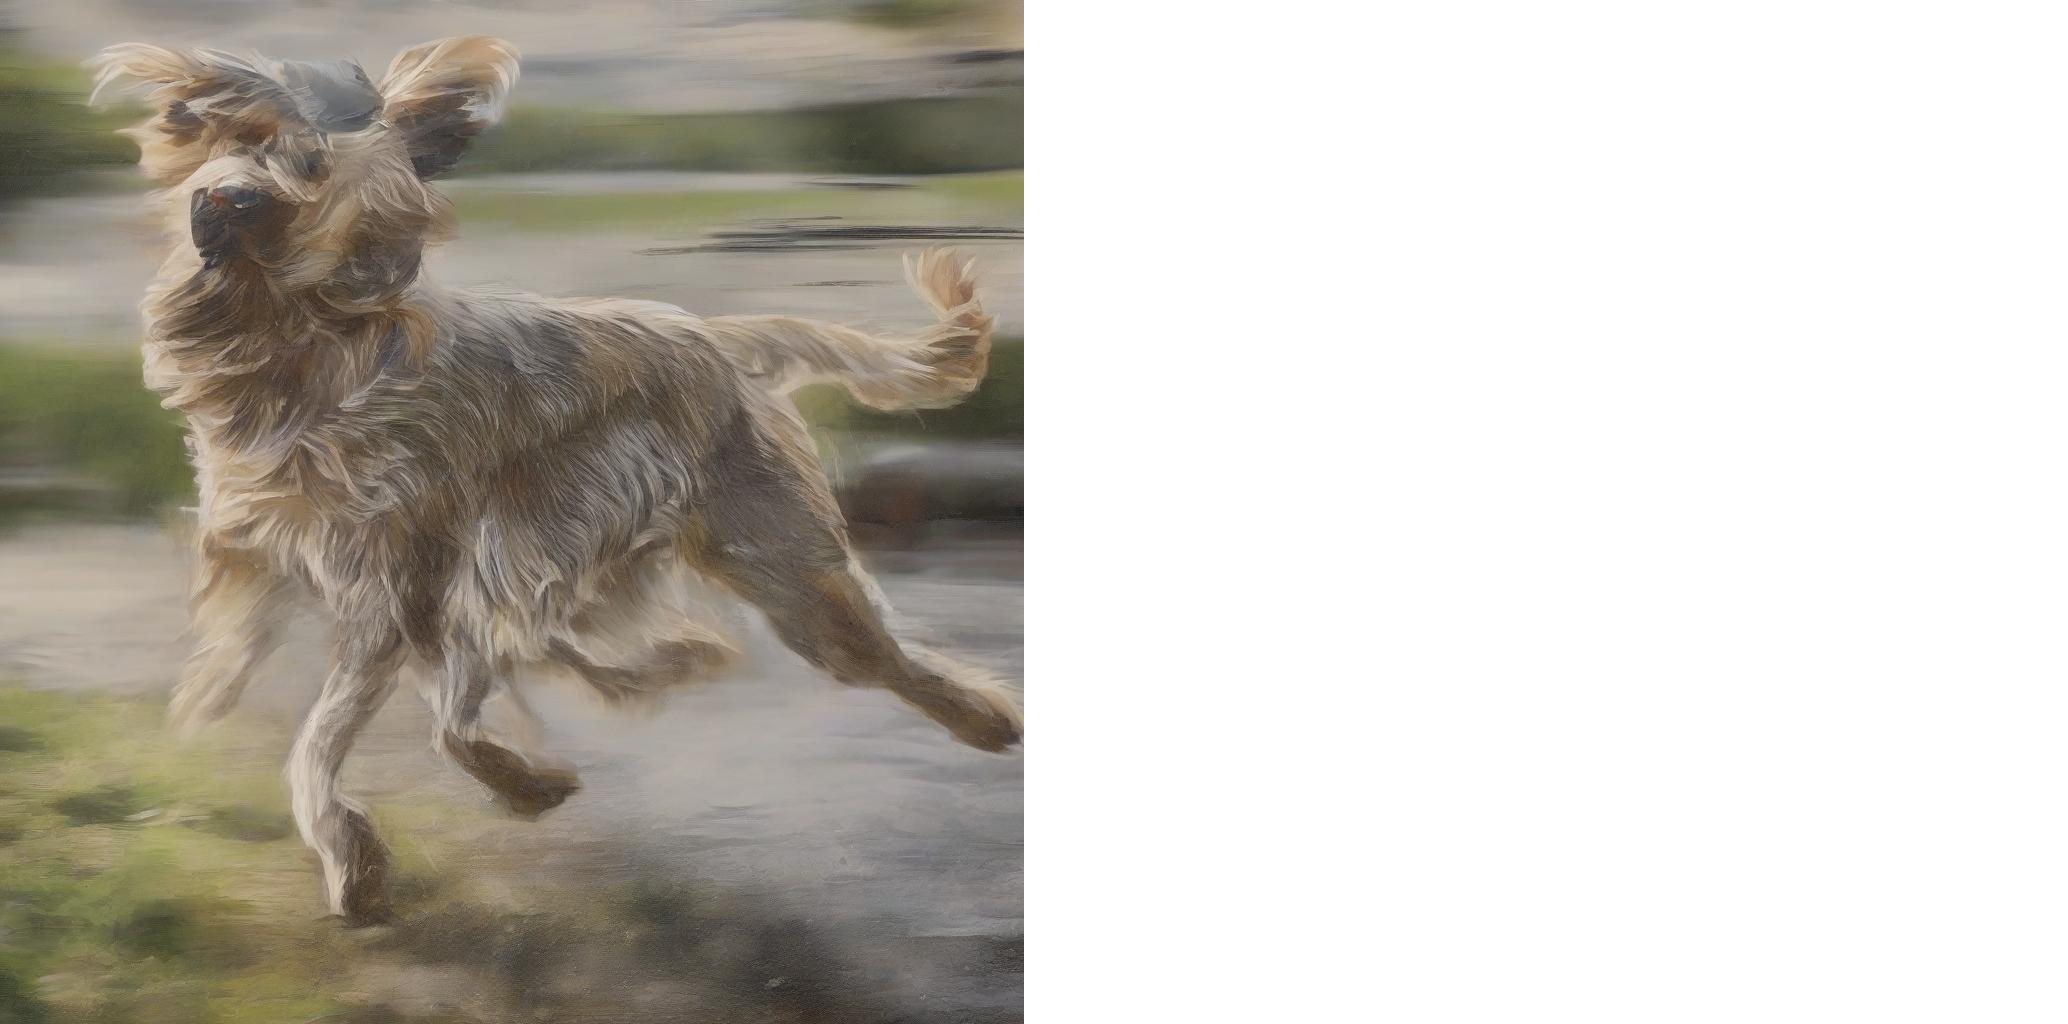

In [29]:
import base64
from io import BytesIO

from google.cloud import aiplatform
from PIL import Image


def base64_to_image(image_str):
    """Convert base64 encoded string to an image."""
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image


def image_grid(imgs, rows=2, cols=2):
    w, h = imgs[0].size
    grid = Image.new(
        mode="RGB", size=(cols * w + 10 * cols, rows * h), color=(255, 255, 255)
    )
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w + 10 * i, i // cols * h))
    return grid

# Replace your project number and endpoint id
endpoint_resource_name=f"projects/{project}/locations/{region}/endpoints/{ENDPOINT_ID2}"
endpoint=aiplatform.Endpoint(endpoint_resource_name)


instances = [
    {
        "prompt": " Generate a photorealistic image of a happy dog running",
        "height": 1024,
        "width": 1024,
    },
]
response = endpoint.predict(instances=instances)

# Do not remove logging section
log_message = f"photorealistic image: {response}"
logging.info(log_message)

images = [
    base64_to_image(response.predictions[0]),
]
image_grid(images, rows=1)



INFO:root:photorealistic image: Prediction(predictions=['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCUHFFHXpSAnNQULnA/woHSlz1o6UwG44peaXFJikAnSjNDe9NJNAATTT0oJzSHpQBeH+rX6Cqkw4/Gra/6tfoKqz/dpiIE61MtQp1qXtQMXNGaBR2

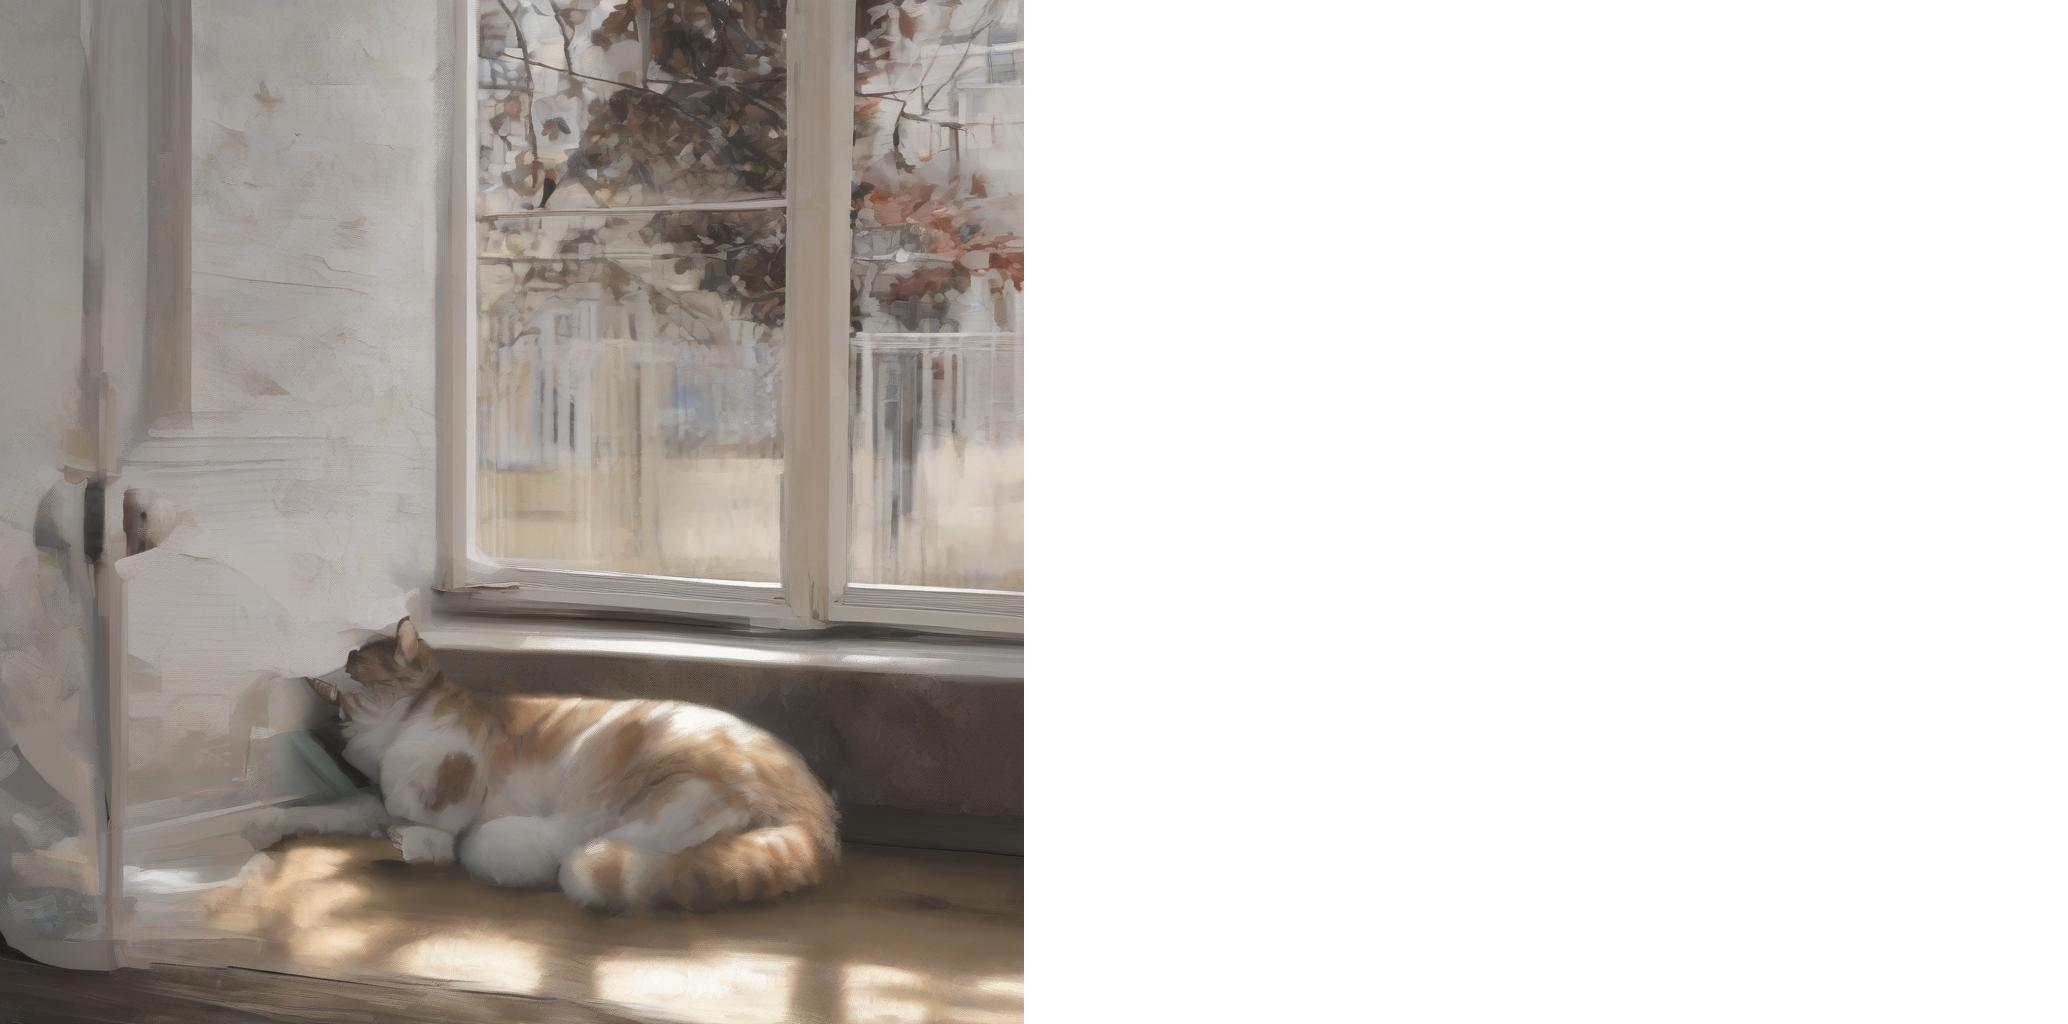

In [35]:
instances = [
    {
        "prompt": " Generate a photorealistic image of a cat sleeping beside a closed window.",
        "height": 1024,
        "width": 1024,
    },
]
response = endpoint.predict(instances=instances)

# Do not remove logging section
log_message = f"photorealistic image: {response}"
logging.info(log_message)

images = [
    base64_to_image(response.predictions[0]),
]
image_grid(images, rows=1)



## Perform Cleanup

### Delete Endpoints

In [36]:
# Delete all endpoints and their deployed models
endpoints = aiplatform.Endpoint.list()
endpoints

 resource name: projects/474364176233/locations/us-central1/endpoints/mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f,
 resource name: projects/474364176233/locations/us-central1/endpoints/2165944448230359040]

In [39]:
endpoints[0].__dict__

{'project': '474364176233',
 'location': 'us-central1',
 'credentials': <google.auth.compute_engine.credentials.Credentials at 0x7fa57174e530>,
 'api_client': <google.cloud.aiplatform.utils.EndpointClientWithOverride at 0x7fa5682d2c80>,
 '_FutureManager__latest_future_lock': <unlocked _thread.lock object at 0x7fa55bfef880>,
 '_FutureManager__latest_future': None,
 '_exception': None,
 '_gca_resource': name: "projects/474364176233/locations/us-central1/endpoints/mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f"
 display_name: "stabilityai_stable-diffusion-xl-1-mg-one-click-deploy"
 deployed_models {
   id: "1599964240762896384"
   model: "projects/474364176233/locations/us-central1/models/stability-ai-stable-diffusion-xl-base-stable-diffusi-1760410521"
   display_name: "stability-ai-stable-diffusion-xl-base-stable-diffusi-1760410521"
   create_time {
     seconds: 1760410849
     nanos: 987069000
   }
   dedicated_resources {
     machine_spec {
       machine_type: "g2-standard-8"
    

In [40]:
endpoints[1].__dict__

{'project': '474364176233',
 'location': 'us-central1',
 'credentials': <google.auth.compute_engine.credentials.Credentials at 0x7fa57174e530>,
 'api_client': <google.cloud.aiplatform.utils.EndpointClientWithOverride at 0x7fa55bef56f0>,
 '_FutureManager__latest_future_lock': <unlocked _thread.lock object at 0x7fa55bece000>,
 '_FutureManager__latest_future': None,
 '_exception': None,
 '_gca_resource': name: "projects/474364176233/locations/us-central1/endpoints/2165944448230359040"
 display_name: "google_codegemma-2b-mg-one-click-deploy"
 deployed_models {
   id: "5396498726636224512"
   model: "projects/474364176233/locations/us-central1/models/google_codegemma-2b-1760410534641"
   display_name: "CodeGemma"
   create_time {
     seconds: 1760410846
     nanos: 243212000
   }
   dedicated_resources {
     machine_spec {
       machine_type: "g2-standard-12"
       accelerator_type: NVIDIA_L4
       accelerator_count: 1
     }
     min_replica_count: 1
     max_replica_count: 1
   }
   

In [48]:
if not endpoints:
    print("No endpoints found in this project/region.")
else:
    for endpoint in endpoints:
        print(f"\nEndpoint: {endpoint.display_name} ({endpoint.resource_name})")

        deployed_models = endpoint.list_models()
        for dm in deployed_models:
            print(f"  Undeploying model ID: {dm.id}")            
            ####TODO Uncomment the statement below #### 
            # endpoint.undeploy(deployed_model_id=dm.id, sync=True)
            print(f"  Undeployed model ID: {dm.id}")

        print("  Deleting endpoint...")
        endpoint.delete(sync=True)
        print(f"  Deleted endpoint: {endpoint.display_name}")


Endpoint: stabilityai_stable-diffusion-xl-1-mg-one-click-deploy (projects/474364176233/locations/us-central1/endpoints/mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f)
  Undeploying model ID: 1599964240762896384
  Undeployed model ID: 1599964240762896384
  Deleting endpoint...


FailedPrecondition: 400 The Endpoint "projects/474364176233/locations/us-central1/endpoints/mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f" has deployed or being-deployed DeployedModel(s). Please undeploy all DeployedModel(s) before deleting the Endpoint.

In [49]:
if not endpoints:
    print("No endpoints found in this project/region.")
else:
    for endpoint in endpoints:
        print(f"\nEndpoint: {endpoint.display_name} ({endpoint.resource_name})")

        deployed_models = endpoint.list_models()
        for dm in deployed_models:
            print(f"  Undeploying model ID: {dm.id}")            
            ####TODO Uncomment the statement below #### 
            # endpoint.undeploy(deployed_model_id=dm.id, sync=True)
            print(f"  Undeployed model ID: {dm.id}")

        print("  Deleting endpoint...")
        endpoint.delete(sync=True)
        print(f"  Deleted endpoint: {endpoint.display_name}")


Endpoint: stabilityai_stable-diffusion-xl-1-mg-one-click-deploy (projects/474364176233/locations/us-central1/endpoints/mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f)


NotFound: 404 Endpoint projects/474364176233/locations/us-central1/endpoints/mg-endpoint-8373b11b-9fac-4256-ab4e-c1895c27a54f is not found.

In [50]:
# Delete all endpoints and their deployed models
endpoints = aiplatform.Endpoint.list()
endpoints

[]

### Delete Models

In [43]:
print("\nDeleting models...")
models = aiplatform.Model.list()



Deleting models...


In [44]:
models

 resource name: projects/474364176233/locations/us-central1/models/google_codegemma-2b-1760410534641,
 resource name: projects/474364176233/locations/us-central1/models/stability-ai-stable-diffusion-xl-base-stable-diffusi-1760410521]

In [45]:
models[0].__dict__

{'project': '474364176233',
 'location': 'us-central1',
 'credentials': <google.auth.compute_engine.credentials.Credentials at 0x7fa57174e530>,
 'api_client': <google.cloud.aiplatform.utils.ModelClientWithOverride at 0x7fa551715000>,
 '_FutureManager__latest_future_lock': <unlocked _thread.lock object at 0x7fa55170f8c0>,
 '_FutureManager__latest_future': None,
 '_exception': None,
 '_gca_resource': name: "projects/474364176233/locations/us-central1/models/google_codegemma-2b-1760410534641"
 display_name: "google_codegemma-2b-1760410534641"
 predict_schemata {
 }
 metadata {
 }
 container_spec {
   image_uri: "us-docker.pkg.dev/vertex-ai/vertex-vision-model-garden-dockers/pytorch-vllm-serve:20240620_1616_RC00"
   args: "python"
   args: "-m"
   args: "vllm.entrypoints.api_server"
   args: "--host=0.0.0.0"
   args: "--port=7080"
   args: "--swap-space=16"
   args: "--gpu-memory-utilization=0.9"
   args: "--max-model-len=2048"
   args: "--trust-remote-code"
   args: "--disable-log-stats"


In [46]:
models[1].__dict__

{'project': '474364176233',
 'location': 'us-central1',
 'credentials': <google.auth.compute_engine.credentials.Credentials at 0x7fa57174e530>,
 'api_client': <google.cloud.aiplatform.utils.ModelClientWithOverride at 0x7fa551714fd0>,
 '_FutureManager__latest_future_lock': <unlocked _thread.lock object at 0x7fa55170ee80>,
 '_FutureManager__latest_future': None,
 '_exception': None,
 '_gca_resource': name: "projects/474364176233/locations/us-central1/models/stability-ai-stable-diffusion-xl-base-stable-diffusi-1760410521"
 display_name: "stability-ai-stable-diffusion-xl-base-stable-diffusi-1760410521"
 predict_schemata {
 }
 metadata {
 }
 container_spec {
   image_uri: "us-docker.pkg.dev/deeplearning-platform-release/vertex-model-garden/pytorch-inference.cu125.0-4.ubuntu2204.py310"
   env {
     name: "DEPLOY_SOURCE"
     value: "API_NATIVE_MODEL"
   }
   env {
     name: "MODEL_ID"
     value: "stabilityai/stable-diffusion-xl-base-1.0"
   }
   env {
     name: "TASK"
     value: "text-t

In [47]:
for model in models:
    print(f"  Deleting model: {model.display_name}")
    ####TODO  Uncomment the statement below #### 
    # model.delete(sync=True)
    print("  Deleted.")

# Do not remove logging section
log_message = "Deleted endpoints"
logging.info(log_message)

  Deleting model: google_codegemma-2b-1760410534641
  Deleted.
  Deleting model: stability-ai-stable-diffusion-xl-base-stable-diffusi-1760410521
  Deleted.


INFO:root:Deleted endpoints
